In [1]:
import matplotlib.pyplot as plt
import csv, glob, os

In [2]:
problem_name = 'dual_benchmark'
base_directory = '../final_tests/Richards/report'

In [3]:
schemes = ['1_LSCHEME', '2_LSCHEME', 'NEWTON', 'PICARD']
directories = [os.path.join(base_directory, problem_name + '_' + scheme) for scheme in schemes]

In [4]:
scheme_dictionary = {}
scheme_iterations = {}
scheme_time = {}

In [5]:
for directory in directories:
    files = glob.glob(os.path.join(directory, '*_' + problem_name +'*.csv'))
    
    scheme = directory.replace(os.path.join(base_directory, problem_name + '_'), '')
    scheme_dictionary[scheme] = []

    print('Pattern ' + os.path.join(directory, '*_' + problem_name +'*.csv') + ' matched with ' + str(len(files)) + ' files of scheme ' + scheme)

    for file in files:
        scheme_dictionary[scheme].append( file )
    
    scheme_dictionary[scheme].sort()

Pattern ../final_tests/Richards/report/dual_benchmark_1_LSCHEME/*_dual_benchmark*.csv matched with 8 files of scheme 1_LSCHEME
Pattern ../final_tests/Richards/report/dual_benchmark_2_LSCHEME/*_dual_benchmark*.csv matched with 8 files of scheme 2_LSCHEME
Pattern ../final_tests/Richards/report/dual_benchmark_NEWTON/*_dual_benchmark*.csv matched with 8 files of scheme NEWTON
Pattern ../final_tests/Richards/report/dual_benchmark_PICARD/*_dual_benchmark*.csv matched with 8 files of scheme PICARD


In [6]:
for scheme in scheme_dictionary:
    scheme_iterations[scheme] = []

    for file in scheme_dictionary[scheme]:
        with open(file, 'r') as csvfile:
            lines = csv.reader(csvfile, delimiter=',')
            scheme_iterations[scheme].append(sum(1 for row in lines))

            print('File ' + file + ' has ' + str(scheme_iterations[scheme][-1]) + ' iterations!')

File ../final_tests/Richards/report/dual_benchmark_1_LSCHEME/10_dual_benchmark_LSCHEME_richards_solver.csv has 61 iterations!
File ../final_tests/Richards/report/dual_benchmark_1_LSCHEME/20_dual_benchmark_LSCHEME_richards_solver.csv has 64 iterations!
File ../final_tests/Richards/report/dual_benchmark_1_LSCHEME/30_dual_benchmark_LSCHEME_richards_solver.csv has 64 iterations!
File ../final_tests/Richards/report/dual_benchmark_1_LSCHEME/40_dual_benchmark_LSCHEME_richards_solver.csv has 64 iterations!
File ../final_tests/Richards/report/dual_benchmark_1_LSCHEME/50_dual_benchmark_LSCHEME_richards_solver.csv has 64 iterations!
File ../final_tests/Richards/report/dual_benchmark_1_LSCHEME/60_dual_benchmark_LSCHEME_richards_solver.csv has 64 iterations!
File ../final_tests/Richards/report/dual_benchmark_1_LSCHEME/70_dual_benchmark_LSCHEME_richards_solver.csv has 64 iterations!
File ../final_tests/Richards/report/dual_benchmark_1_LSCHEME/80_dual_benchmark_LSCHEME_richards_solver.csv has 64 iter

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


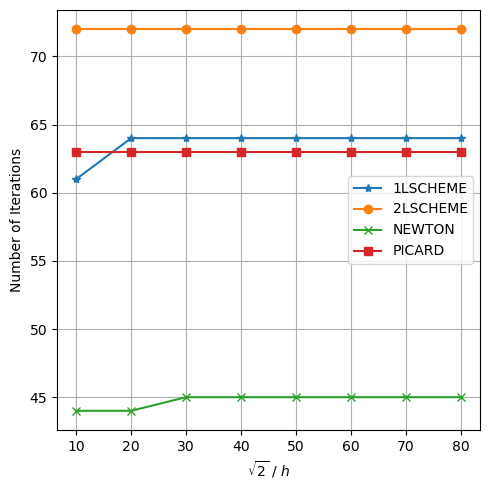

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
names = []
symbols = ['-*', '-o', '-x', '-s']

for scheme, symbol in zip(scheme_iterations, symbols):

    values = scheme_iterations[scheme]

    ax.plot(range(10, 10*len(values)+1, 10), values, symbol)
    ax.set_ylabel('Number of Iterations')
    ax.set_xlabel('$\sqrt{2}$ / $h$')

    names.append(scheme.replace('_', ''))

ax.legend(names)
ax.grid()

plt.tight_layout()
plt.savefig('iteration_comparison.eps', format='eps')